In [1]:
import pandas as pd

import numpy as np

import eda_helper as ed

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
case1 = pd.read_excel("data/case_study1.xlsx")
case2 = pd.read_excel("data/case_study2.xlsx")

In [4]:
# !pip install openpyxl

In [5]:
case1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [6]:
case2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [7]:
case1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [8]:
case2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

### MERGING CASE1 and CASE 2

In [9]:
def removing_cols(df):
    cols = []
    for col in df.columns:
        if df[df[col] == -99999].shape[0] > 10000:
            cols.append(col)
    return cols

In [10]:
case = (
    pd
    .merge(case1, case2, on='PROSPECTID', how='inner')
)

## working on merge dataframe

In [206]:
def clean_data(case):
    return (
        case
        .drop(columns=removing_cols(case))
        .rename(columns=lambda df_ : df_.lower())
        .set_index("prospectid")
        .replace(-99999, np.nan)
        .dropna()

        .assign(
            education=lambda df_: (
                df_.education.replace({
                    "UNDER GRADUATE" : "UG",
                    "POST-GRADUATE" : "PG",
                    "PROFESSIONAL" : "PRO"
                })
            )
        )
    )

In [207]:
df = clean_data(case)
df.sample(5)

,total_tl,tot_closed_tl,tot_active_tl,total_tl_opened_l6m,tot_tl_closed_l6m,pct_tl_open_l6m,pct_tl_closed_l6m,pct_active_tl,pct_closed_tl,total_tl_opened_l12m,tot_tl_closed_l12m,pct_tl_open_l12m,pct_tl_closed_l12m,tot_missed_pmnt,auto_tl,cc_tl,consumer_tl,gold_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,cc_enq,cc_enq_l6m,cc_enq_l12m,pl_enq,pl_enq_l6m,pl_enq_l12m,time_since_recent_enq,enq_l12m,enq_l6m,enq_l3m,maritalstatus,education,age,gender,netmonthlyincome,time_with_curr_empr,pct_of_active_tls_ever,pct_opened_tls_l6m_of_l12m,pct_currentbal_all_tl,cc_flag,pl_flag,pct_pl_enq_l6m_of_l12m,pct_cc_enq_l6m_of_l12m,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag,last_prod_enq2,first_prod_enq2,credit_score,approved_flag
prospectid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5486,11,4,7,5,1,0.455,0.091,0.636,0.364,8,4,0.727,0.364,6,0,0,1,10,0,0,10,1,0,23.0,1.0,83.0,0,0,0,0,0,0,0,8,0,4,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,183.0,1.0,0.0,0.0,Married,SSC,24,M,17000,65,0.636,0.625,0.994,0,0,0.0,0.0,0.0,0.0,1,0,PL,PL,696,P2
20258,4,3,1,0,1,0.000,0.250,0.250,0.750,2,1,0.500,0.250,0,0,0,2,1,0,0,2,2,1,72.0,6.0,81.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,2.0,0.0,0.0,Married,GRADUATE,31,M,20000,68,0.250,0.000,0.400,0,0,0.0,0.0,0.0,0.0,1,0,others,others,686,P2
40889,6,2,4,0,0,0.000,0.000,0.667,0.333,0,1,0.000,0.167,0,1,0,4,0,0,0,1,5,1,51.0,18.0,94.0,11,23,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,6.0,0.0,0.0,0.0,0.0,0.0,0.0,189.0,2.0,0.0,0.0,Single,UG,45,M,18000,107,0.667,0.000,0.000,0,0,0.0,0.0,0.0,0.0,0,0,others,others,675,P2
14293,1,0,1,0,0,0.000,0.000,1.000,0.000,0,0,0.000,0.000,0,1,0,0,0,0,0,1,0,0,19.0,19.0,43.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,1466.0,0.0,0.0,0.0,Married,12TH,49,M,21000,74,1.000,0.000,0.342,0,0,0.0,0.0,0.0,0.0,0,0,PL,PL,694,P2
22821,5,2,3,0,1,0.000,0.200,0.600,0.400,2,1,0.400,0.200,1,1,0,1,0,0,1,2,3,2,40.0,6.0,50.0,0,0,0,0,0,0,0,16,4,10,0,0,0,0,0,0,0,0,0,0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,456.0,0.0,0.0,0.0,Married,SSC,36,M,27000,131,0.600,0.000,0.853,0,1,0.0,0.0,0.0,0.0,0,0,PL,ConsumerLoan,700,P2


In [208]:
df['education'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'PG', 'UG', 'OTHERS', 'PRO'],
      dtype=object)

In [13]:
categorical_cols = df.describe(include='O').columns
numerical_cols = df.describe(include='number').columns

## Categorical columns only

- when we deal with two categorical features , eg. Cat1 and Target -> Do chi-Square test -> Create Contingency Table

In [14]:
# df[['maritalstatus', 'approved_flag']]
pd.crosstab(df['maritalstatus'], df['approved_flag'])

approved_flag,P1,P2,P3,P4
maritalstatus,,,,
Married,4435,18718,4387,3346
Single,473,6734,2053,1918


# CAT VS CAT -> CHI-SQUARE TEST
# CAT VS NUM -> T-TEST(2 CATEGORIES), ANOVA(>= 2 CATEGORIES)

## Chi square test

In [15]:
for i in categorical_cols[0:-1]:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['approved_flag']))
    print(i, "----", pval)

maritalstatus ---- 3.578180861038862e-233
education ---- 2.6942265249737532e-30
gender ---- 1.907936100186563e-05
last_prod_enq2 ---- 0.0
first_prod_enq2 ---- 7.84997610555419e-287


- since all the categorical columns has pvalue less than 0.05 so we accept all columns

In [46]:
df.describe(include='O')

,maritalstatus,education,gender,last_prod_enq2,first_prod_enq2,approved_flag
count,42064,42064,42064,42064,42064,42064
unique,2,7,2,6,6,4
top,Married,GRADUATE,M,ConsumerLoan,others,P2
freq,30886,14140,37345,16480,20640,25452


In [17]:
def get_bar(ser: pd.Series):
    return ser.value_counts().plot(kind='bar', x='count')

### maritalstatus

<Axes: xlabel='maritalstatus'>

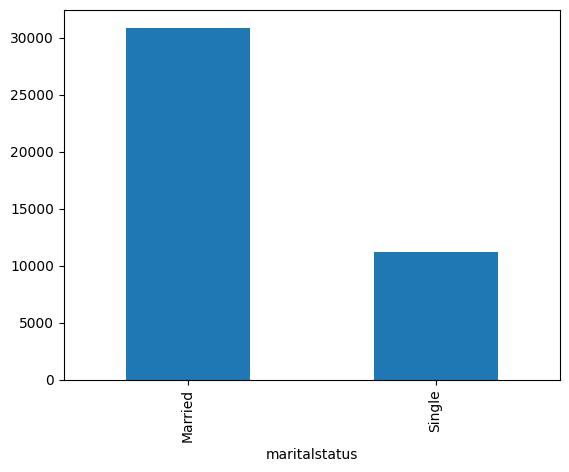

In [18]:
df['maritalstatus'].unique()
get_bar(df['maritalstatus'])

### education

<Axes: xlabel='education'>

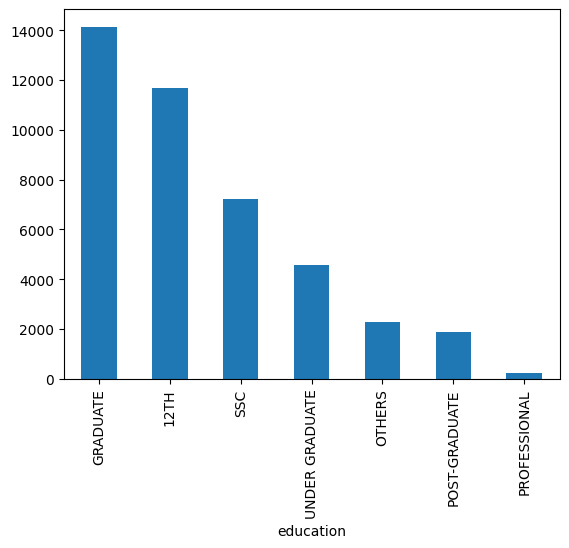

In [19]:
# df['education'].unique()
get_bar(df['education'])

<Axes: xlabel='gender'>

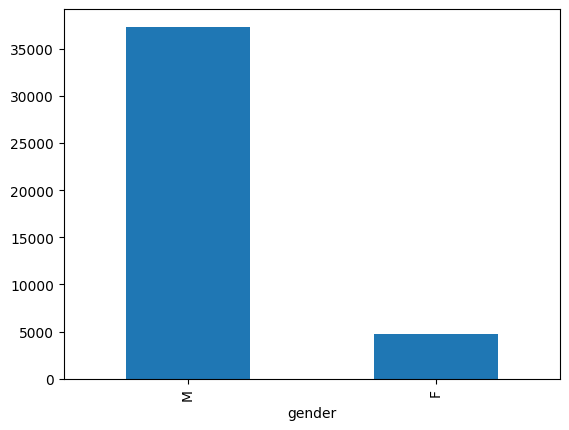

In [20]:
get_bar(df['gender'])

<Axes: xlabel='last_prod_enq2'>

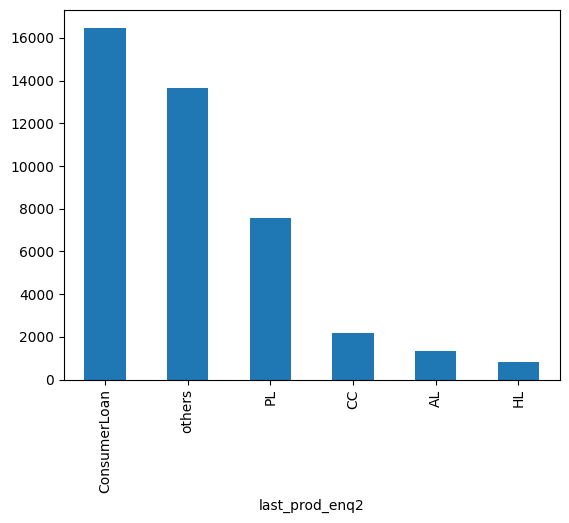

In [21]:
get_bar(df['last_prod_enq2'])

<Axes: xlabel='first_prod_enq2'>

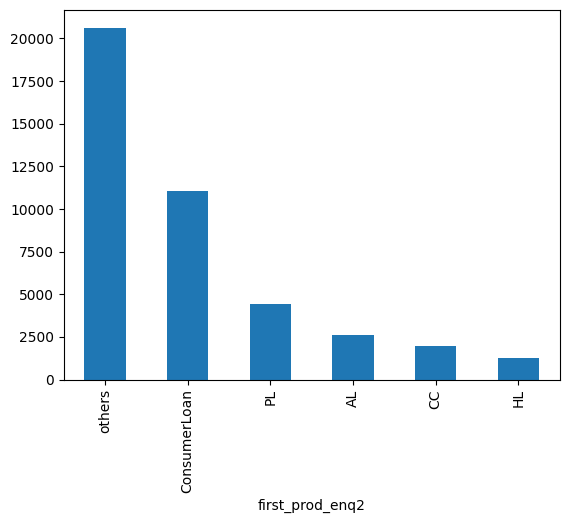

In [22]:
get_bar(df['first_prod_enq2'])

approved_flag
P2    0.605078
P3    0.153100
P4    0.125143
P1    0.116679
Name: proportion, dtype: float64

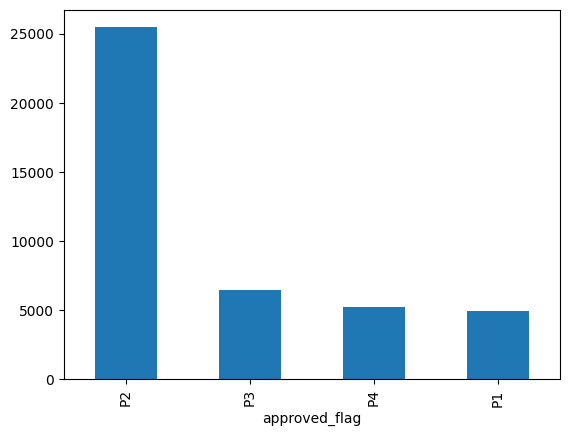

In [23]:
get_bar(df['approved_flag'])
df['approved_flag'].value_counts(normalize=True)

In [24]:
# lets check multicollinearity among input columns

In [25]:
# diff between multicollinearity and correlation
# mc -> Predictability of each feature by other features

<Axes: >

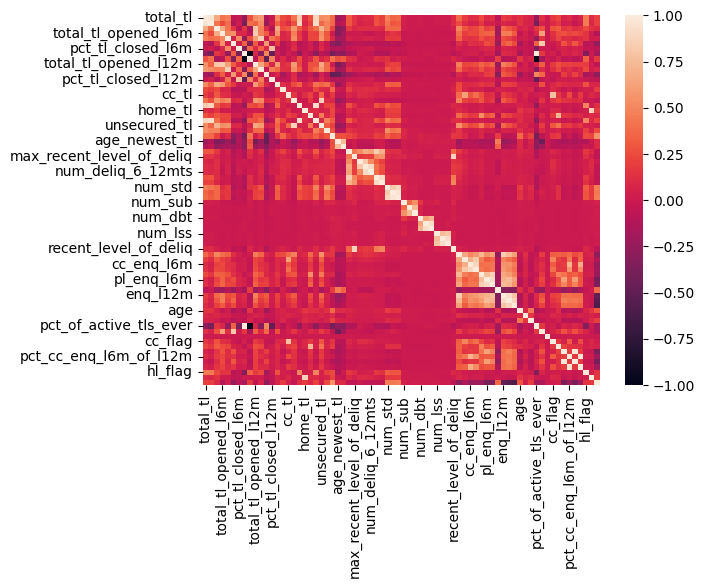

In [26]:
sns.heatmap(df[numerical_cols].corr())

# VIF Sequential Check

In [27]:
vif_data = df[numerical_cols]
columns_to_be_kept = []
column_index = 0

In [28]:
for i in range(0, vif_data.shape[1]):
    vif_value = variance_inflation_factor(vif_data, column_index)
    print(column_index, "----", vif_value)

    if vif_value <= 6:
        columns_to_be_kept.append(numerical_cols[i])
        column_index += 1
        continue

    vif_data = vif_data.drop([numerical_cols[i]], axis=1)

/home/prafull/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 ---- inf


/home/prafull/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 ---- inf
0 ---- 11.320180023967996
0 ---- 8.363698035000327
0 ---- 6.520647877790928
0 ---- 5.149501618212625
1 ---- 2.611111040579735


/home/prafull/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


2 ---- inf
2 ---- 1788.7926256209232
2 ---- 8.601028256477228
2 ---- 3.8328007921530785
3 ---- 6.099653381646727
3 ---- 5.581352009642762
4 ---- 1.985584353098778


/home/prafull/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


5 ---- inf
5 ---- 4.809538302819343
6 ---- 23.270628983464636
6 ---- 30.595522588100053
6 ---- 4.3843464059655854
7 ---- 3.0646584155234238
8 ---- 2.898639771299251
9 ---- 4.377876915347324
10 ---- 2.207853583695844
11 ---- 4.916914200506864
12 ---- 5.214702030064725
13 ---- 3.3861625024231476
14 ---- 7.840583309478997
14 ---- 5.255034641721438


/home/prafull/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15 ---- inf
15 ---- 7.380634506427238
15 ---- 1.4210050015175733
16 ---- 8.083255010190323
16 ---- 1.6241227524040114
17 ---- 7.257811920140003
17 ---- 15.59624383268298
17 ---- 1.825857047132431
18 ---- 1.5080839450032664
19 ---- 2.172088834824578
20 ---- 2.623397553527229
21 ---- 2.2959970812106167
22 ---- 7.360578319196439
22 ---- 2.1602387773102554
23 ---- 2.8686288267891467
24 ---- 6.458218003637277
24 ---- 2.8474118865638265
25 ---- 4.7531981562840855
26 ---- 16.22735475594825
26 ---- 6.424377256363877
26 ---- 8.887080381808687
26 ---- 2.3804746142952666
27 ---- 8.609513476514548
27 ---- 13.06755093547673
27 ---- 3.5000400566546555
28 ---- 1.9087955874813773
29 ---- 17.006562234161628
29 ---- 10.730485153719197
29 ---- 2.3538497522950275
30 ---- 22.104855915136433
30 ---- 2.7971639638512915
31 ---- 3.424171203217696
32 ---- 10.175021454450912
32 ---- 6.408710354561296
32 ---- 1.001151196262563
33 ---- 3.069197305397274
34 ---- 2.8091261600643724
35 ---- 20.249538381980678
35 ----

In [29]:
(
    df
    [columns_to_be_kept]
)

,pct_tl_open_l6m,pct_tl_closed_l6m,tot_tl_closed_l12m,pct_tl_closed_l12m,tot_missed_pmnt,cc_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,num_lss_12mts,recent_level_of_deliq,cc_enq_l12m,pl_enq_l12m,time_since_recent_enq,enq_l3m,netmonthlyincome,time_with_curr_empr,pct_currentbal_all_tl,cc_flag,pl_flag,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag
prospectid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.00,0,0.000,0,0,0,4,1,4,0,72.0,18.0,549.0,29,0,0,11,0,0,0,0,0,0,0,29,0.0,0.0,566.0,0.0,51000,114,0.798,0,1,0.000,0.0,1,0
2,0.000,0.00,0,0.000,0,0,0,0,0,1,0,7.0,7.0,47.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,209.0,0.0,19000,50,0.370,0,0,0.000,0.0,0,0
3,0.125,0.00,0,0.000,1,0,0,0,2,6,0,47.0,2.0,302.0,25,8,0,10,0,0,0,0,0,0,0,25,0.0,0.0,587.0,0.0,18,191,0.585,0,0,0.000,0.0,1,0
5,0.000,0.00,0,0.000,0,0,0,0,3,0,2,131.0,32.0,583.0,0,0,0,16,0,0,0,0,0,0,0,0,0.0,0.0,3951.0,0.0,15000,75,0.000,0,0,0.000,0.0,0,0
6,0.000,0.00,1,0.167,0,0,0,0,6,0,0,150.0,17.0,245.0,270,0,11,2,3,0,1,0,0,0,0,26,1.0,3.0,7.0,4.0,0,154,0.000,0,0,0.429,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51332,0.333,0.00,0,0.000,0,0,0,0,0,3,1,24.0,5.0,15.0,24,0,0,0,0,0,0,0,0,0,0,24,0.0,0.0,0.0,1.0,18500,249,0.230,0,0,0.000,0.0,0,0
51333,0.000,0.25,1,0.250,0,0,0,0,2,2,0,74.0,7.0,57.0,0,0,0,6,0,0,0,0,0,0,0,0,0.0,0.0,203.0,0.0,25000,186,0.660,0,0,0.000,0.0,0,0
51334,0.500,0.50,1,0.500,0,0,0,0,0,2,0,9.0,5.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,1.0,2.0,18000,66,0.428,0,0,1.000,0.0,0,0


## ANOVA Test on VIF selected columns

In [30]:
columns_to_be_kept_anova = []

for i in columns_to_be_kept:
    a = df[i].to_list()
    b = df['approved_flag'].to_list()

    grp_P1 = [value for value, group in zip(a, b) if group == 'P1']
    grp_P2 = [value for value, group in zip(a, b) if group == 'P2']
    grp_P3 = [value for value, group in zip(a, b) if group == 'P3']
    grp_P4 = [value for value, group in zip(a, b) if group == 'P4']

    f_statistic, p_value = f_oneway(grp_P1, grp_P2, grp_P3, grp_P4)

    if p_value <= 0.05:
        columns_to_be_kept_anova.append(i)

In [31]:
(
    df
    [columns_to_be_kept_anova]
)

,pct_tl_open_l6m,pct_tl_closed_l6m,tot_tl_closed_l12m,pct_tl_closed_l12m,tot_missed_pmnt,cc_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,cc_enq_l12m,pl_enq_l12m,time_since_recent_enq,enq_l3m,netmonthlyincome,time_with_curr_empr,cc_flag,pl_flag,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag
prospectid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.00,0,0.000,0,0,0,4,1,4,0,72.0,18.0,549.0,29,0,0,11,0,0,0,0,0,0,29,0.0,0.0,566.0,0.0,51000,114,0,1,0.000,0.0,1,0
2,0.000,0.00,0,0.000,0,0,0,0,0,1,0,7.0,7.0,47.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,209.0,0.0,19000,50,0,0,0.000,0.0,0,0
3,0.125,0.00,0,0.000,1,0,0,0,2,6,0,47.0,2.0,302.0,25,8,0,10,0,0,0,0,0,0,25,0.0,0.0,587.0,0.0,18,191,0,0,0.000,0.0,1,0
5,0.000,0.00,0,0.000,0,0,0,0,3,0,2,131.0,32.0,583.0,0,0,0,16,0,0,0,0,0,0,0,0.0,0.0,3951.0,0.0,15000,75,0,0,0.000,0.0,0,0
6,0.000,0.00,1,0.167,0,0,0,0,6,0,0,150.0,17.0,245.0,270,0,11,2,3,0,1,0,0,0,26,1.0,3.0,7.0,4.0,0,154,0,0,0.429,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51332,0.333,0.00,0,0.000,0,0,0,0,0,3,1,24.0,5.0,15.0,24,0,0,0,0,0,0,0,0,0,24,0.0,0.0,0.0,1.0,18500,249,0,0,0.000,0.0,0,0
51333,0.000,0.25,1,0.250,0,0,0,0,2,2,0,74.0,7.0,57.0,0,0,0,6,0,0,0,0,0,0,0,0.0,0.0,203.0,0.0,25000,186,0,0,0.000,0.0,0,0
51334,0.500,0.50,1,0.500,0,0,0,0,0,2,0,9.0,5.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,1.0,2.0,18000,66,0,0,1.000,0.0,0,0


In [32]:
(
    pd
    .merge(
        df[columns_to_be_kept_anova],
        df[categorical_cols],
        how='inner',
        on='prospectid'
    )
)

,pct_tl_open_l6m,pct_tl_closed_l6m,tot_tl_closed_l12m,pct_tl_closed_l12m,tot_missed_pmnt,cc_tl,home_tl,pl_tl,secured_tl,unsecured_tl,other_tl,age_oldest_tl,age_newest_tl,time_since_recent_payment,max_recent_level_of_deliq,num_deliq_6_12mts,num_times_60p_dpd,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_12mts,num_lss,recent_level_of_deliq,cc_enq_l12m,pl_enq_l12m,time_since_recent_enq,enq_l3m,netmonthlyincome,time_with_curr_empr,cc_flag,pl_flag,pct_pl_enq_l6m_of_ever,pct_cc_enq_l6m_of_ever,hl_flag,gl_flag,maritalstatus,education,gender,last_prod_enq2,first_prod_enq2,approved_flag
prospectid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.00,0,0.000,0,0,0,4,1,4,0,72.0,18.0,549.0,29,0,0,11,0,0,0,0,0,0,29,0.0,0.0,566.0,0.0,51000,114,0,1,0.000,0.0,1,0,Married,12TH,M,PL,PL,P2
2,0.000,0.00,0,0.000,0,0,0,0,0,1,0,7.0,7.0,47.0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,209.0,0.0,19000,50,0,0,0.000,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2
3,0.125,0.00,0,0.000,1,0,0,0,2,6,0,47.0,2.0,302.0,25,8,0,10,0,0,0,0,0,0,25,0.0,0.0,587.0,0.0,18,191,0,0,0.000,0.0,1,0,Married,SSC,M,ConsumerLoan,others,P2
5,0.000,0.00,0,0.000,0,0,0,0,3,0,2,131.0,32.0,583.0,0,0,0,16,0,0,0,0,0,0,0,0.0,0.0,3951.0,0.0,15000,75,0,0,0.000,0.0,0,0,Married,POST-GRADUATE,M,AL,AL,P1
6,0.000,0.00,1,0.167,0,0,0,0,6,0,0,150.0,17.0,245.0,270,0,11,2,3,0,1,0,0,0,26,1.0,3.0,7.0,4.0,0,154,0,0,0.429,0.0,1,0,Married,12TH,M,ConsumerLoan,PL,P3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51332,0.333,0.00,0,0.000,0,0,0,0,0,3,1,24.0,5.0,15.0,24,0,0,0,0,0,0,0,0,0,24,0.0,0.0,0.0,1.0,18500,249,0,0,0.000,0.0,0,0,Married,12TH,M,ConsumerLoan,ConsumerLoan,P4
51333,0.000,0.25,1,0.250,0,0,0,0,2,2,0,74.0,7.0,57.0,0,0,0,6,0,0,0,0,0,0,0,0.0,0.0,203.0,0.0,25000,186,0,0,0.000,0.0,0,0,Married,SSC,M,others,others,P1
51334,0.500,0.50,1,0.500,0,0,0,0,0,2,0,9.0,5.0,32.0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,1.0,2.0,18000,66,0,0,1.000,0.0,0,0,Married,SSC,M,ConsumerLoan,others,P3


In [33]:
for col in categorical_cols:
    print(col, ":", df[col].unique())
    print("---"*10)

maritalstatus : ['Married' 'Single']
------------------------------
education : ['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
------------------------------
gender : ['M' 'F']
------------------------------
last_prod_enq2 : ['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
------------------------------
first_prod_enq2 : ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']
------------------------------
approved_flag : ['P2' 'P1' 'P3' 'P4']
------------------------------


## Encoding to categorical columns
- ordinal encoding to education columns

In [34]:
df_ = (
    df
    .assign(
        education=lambda df_ : (
            df_.education.replace({
                "SSC": 1,
                "OTHERS": 1,
                "12TH": 2,
                "GRADUATE": 3,
                "UNDER GRADUATE": 3,
                "PROFESSIONAL": 3,
                "POST-GRADUATE": 4
            })
        )
    )
)

In [35]:
(
    pd
    .merge(
        df[columns_to_be_kept_anova],
        df[categorical_cols],
        how='inner',
        on='prospectid'
    )
    .columns
)

Index(['pct_tl_open_l6m', 'pct_tl_closed_l6m', 'tot_tl_closed_l12m',
       'pct_tl_closed_l12m', 'tot_missed_pmnt', 'cc_tl', 'home_tl', 'pl_tl',
       'secured_tl', 'unsecured_tl', 'other_tl', 'age_oldest_tl',
       'age_newest_tl', 'time_since_recent_payment',
       'max_recent_level_of_deliq', 'num_deliq_6_12mts', 'num_times_60p_dpd',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_12mts', 'num_lss', 'recent_level_of_deliq', 'cc_enq_l12m',
       'pl_enq_l12m', 'time_since_recent_enq', 'enq_l3m', 'netmonthlyincome',
       'time_with_curr_empr', 'cc_flag', 'pl_flag', 'pct_pl_enq_l6m_of_ever',
       'pct_cc_enq_l6m_of_ever', 'hl_flag', 'gl_flag', 'maritalstatus',
       'education', 'gender', 'last_prod_enq2', 'first_prod_enq2',
       'approved_flag'],
      dtype='object')

## Splitting data

In [36]:
(X_train, X_val, X_test), (y_train, y_val, y_test) = ed.split_data(df_, 'approved_flag')

In [37]:
# (
#     X_test
#     .assign(
#         approved_flag=y_test
#     )
# ).to_csv("test.csv",index=False)

## Creating Pipelines:
    - onehot encoding to remaining categorical columns

In [38]:
numeric = Pipeline([
    ("scaling", StandardScaler())
])

categoric = Pipeline([
    ("ohe", OneHotEncoder(sparse_output=False, handle_unknown='ignore', dtype=np.int32))
])

In [39]:
preprocessing = ColumnTransformer([
    ("numerical", numeric, columns_to_be_kept_anova),
    ("categorical", categoric, ["maritalstatus", "education", "gender", "last_prod_enq2", "first_prod_enq2"])
], remainder='passthrough')

In [40]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical',
                                 Pipeline(steps=[('scaling',
                                                  StandardScaler())]),
                                 ['pct_tl_open_l6m', 'pct_tl_closed_l6m',
                                  'tot_tl_closed_l12m', 'pct_tl_closed_l12m',
                                  'tot_missed_pmnt', 'cc_tl', 'home_tl',
                                  'pl_tl', 'secured_tl', 'unsecured_tl',
                                  'other_tl', 'age_oldest_tl', 'age_newest_tl',
                                  'time_since_recent_payment',
                                  'max_recen...
                                  'num_sub_12mts', 'num_dbt', 'num_dbt_12mts',
                                  'num_lss', 'recent_level_of_deliq',
                                  'cc_enq_l12m', 'pl_enq_l12m',
                                  'time_since_recent_enq', 'enq_l3m',
                                  'netmonthlyincome', ...]),
                                ('categorical',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(dtype=<class 'numpy.int32'>,
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['maritalstatus', 'education', 'gender',
                                  'last_prod_enq2', 'first_prod_enq2'])])

In [41]:
preprocessing.fit_transform(X_train)

array([[-6.40238476e-01, -4.65963466e-01, -5.36752489e-01, ...,
         0.00000000e+00,  0.00000000e+00,  6.93000000e+02],
       [ 2.58265391e-01,  7.13166593e-01,  1.10766086e-01, ...,
         0.00000000e+00,  0.00000000e+00,  6.87000000e+02],
       [-6.40238476e-01, -4.65963466e-01, -5.36752489e-01, ...,
         0.00000000e+00,  0.00000000e+00,  6.81000000e+02],
       ...,
       [-6.40238476e-01, -1.49956610e-01,  1.40580324e+00, ...,
         3.33000000e-01,  1.00000000e+00,  6.46000000e+02],
       [-6.40238476e-01, -4.65963466e-01, -5.36752489e-01, ...,
         0.00000000e+00,  0.00000000e+00,  6.86000000e+02],
       [-1.90986543e-01, -4.65963466e-01, -5.36752489e-01, ...,
         0.00000000e+00,  1.00000000e+00,  6.93000000e+02]])

## Model training and evaluating

In [42]:
def model_evaluating(model):
    pipe = Pipeline([
        ("preprocessing", preprocessing),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)

    y_pred_ = pipe.predict(X_train)
    y_val_ = pipe.predict(X_val)

    columns = [
        "train_accuracy",
        "test_accuracy",
        "train_recall",
        "test_recall",
        "train_f1",
        "test_f1"
    ]

    values = [
        accuracy_score(y_train, y_pred_),
        accuracy_score(y_val, y_val_),
        
        recall_score(y_train, y_pred_, average='macro'),
        recall_score(y_val, y_val_, average='macro'),
        
        f1_score(y_train, y_pred_, average='macro'),
        f1_score(y_val, y_val_, average='macro'),
    ]

    data = pd.DataFrame()
    data['columns'] = columns
    data['performance'] = values

    return {
        "data" : data,
        "model" : pipe
    }

### Decision Tree

In [43]:
dt = model_evaluating(DecisionTreeClassifier(max_depth=3))
dt['data']

,columns,performance
0,train_accuracy,0.996025
1,test_accuracy,0.994206
2,train_recall,0.991522
3,test_recall,0.987672
4,train_f1,0.992428
5,test_f1,0.989103


### Random Forest

In [44]:
rf = model_evaluating(RandomForestClassifier(n_estimators=100))
rf['data']

,columns,performance
0,train_accuracy,1.000000
1,test_accuracy,0.984995
2,train_recall,1.000000
3,test_recall,0.975061
4,train_f1,1.000000
5,test_f1,0.975622


In [193]:
rows = len(categorical_cols) // 3
cols = 3

# test = df[categorical_cols]

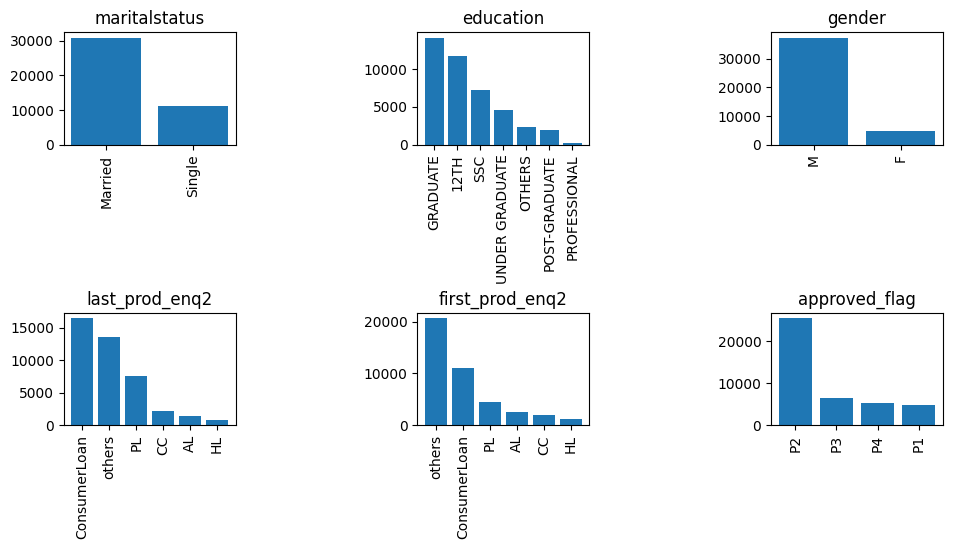

In [152]:
fig, axes = plt.subplots(rows, cols, figsize=(12,7))
fig.tight_layout(pad=10)
index = 0
for ax in axes:
    for a in ax:
        bar = test.iloc[:,index].value_counts().reset_index()
        a.set_title(categorical_cols[index])
        a.bar(x=bar.iloc[:,0], height=bar.iloc[:,1])
        a.tick_params(axis='x', labelrotation=90)
        index += 1

In [197]:
# df[categorical_cols]
# numerical_cols

rows = len(numerical_cols) // 3
cols = 3